# Outlier Detection
## Box Plot and IQR method 

This is mainly used when the data is skewed...

This is pretty similar actually, 

IQR = Q3 - Q1

- Maximum = Q3 + 1.5IQR
- Minimum = Q1 - 1.5IQR

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('placement.csv')

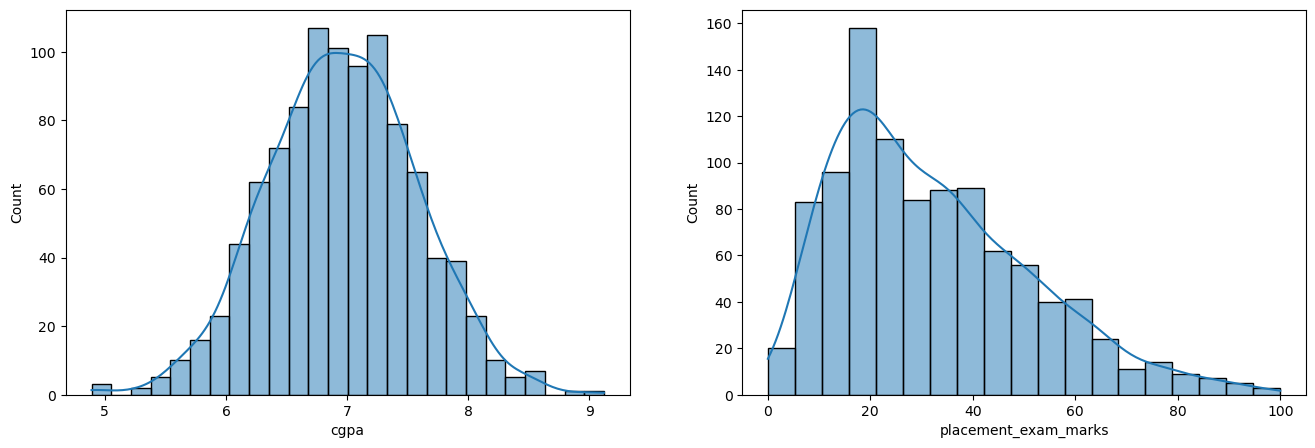

In [46]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [47]:
df['placement_exam_marks'].skew()

0.8356419499466834

Since 'placement_exam_marks' is skewed, we would want to use IQR method on it...

In [48]:
# check out the column stats
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

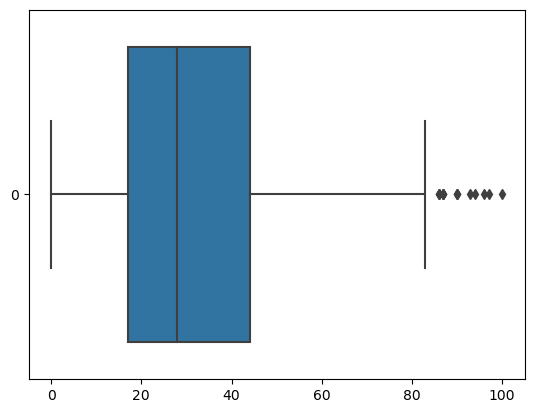

In [49]:
sns.boxplot(df['placement_exam_marks'], orient='h')

In [50]:
# calculate IQR
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [51]:
IQR = Q3 - Q1
IQR

27.0

In [52]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

### Finding Outliers

In [53]:
# list the outliers
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit) ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Handling Outliers
### Trimming

In [54]:
# this is a trimmed dataset
new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit) ]
new_df.shape
# notice that the rows have been removed

(985, 3)

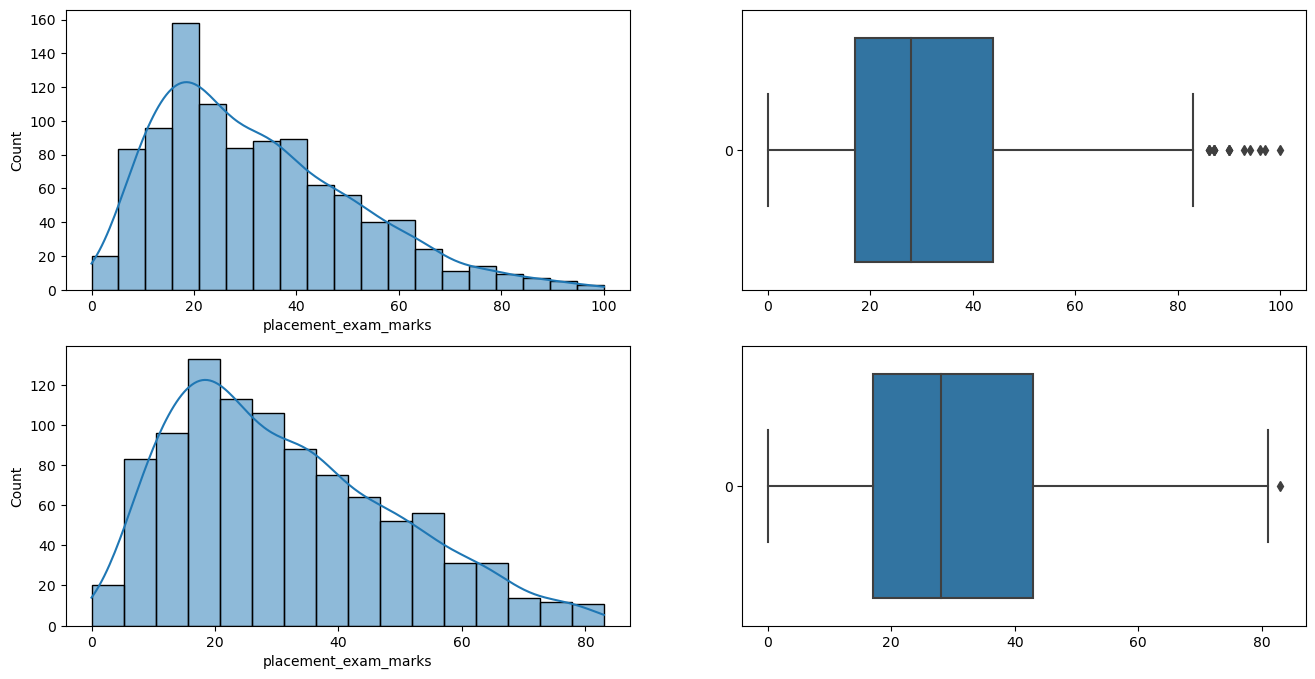

In [55]:
# compare the distribution
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'], orient='h')

plt.show()

Not much to see here, the differnece is not big. WE can give this one a PASS...

### Capping

In [56]:
# create a new copy of the dataset for capping
new_df_cap = df.copy()
# copies the dataframe 'df' into 'new_df_cap'

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
    np.where(
        new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [57]:
new_df_cap.shape
# the columns did not reduce, because obviously, we are not removing them in this case

(1000, 3)

<Axes: >

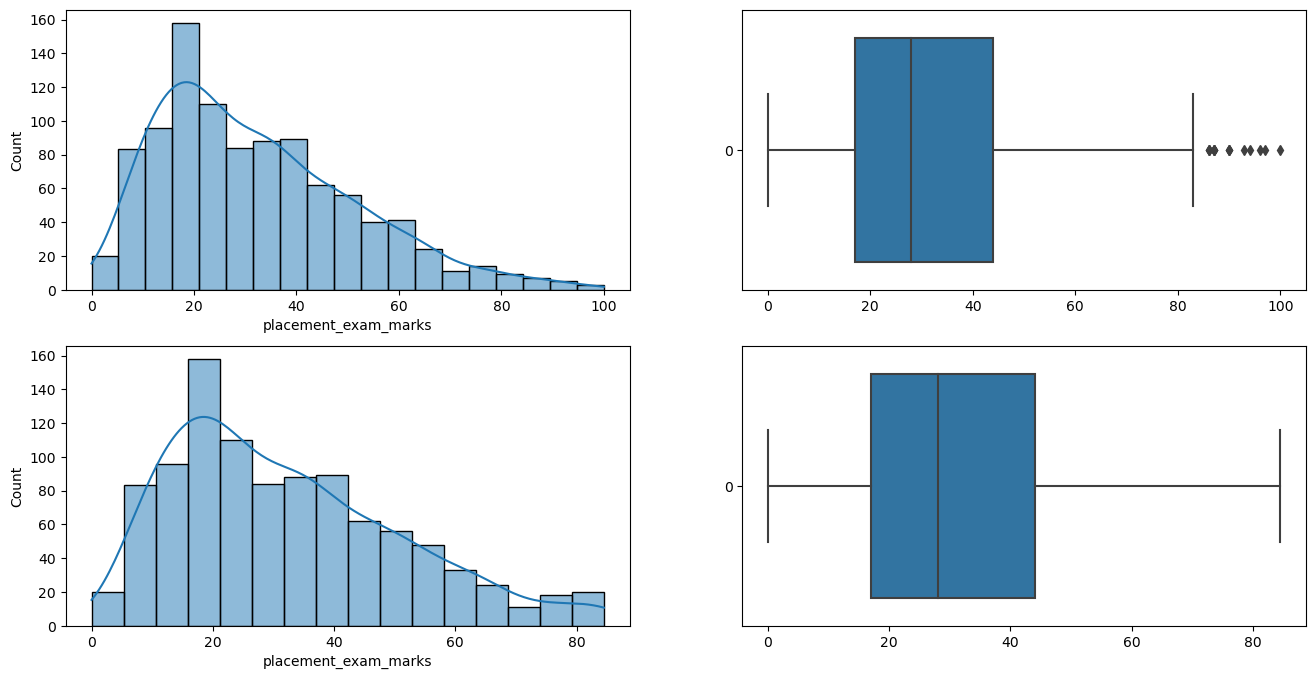

In [58]:
# comparing again...
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'], orient='h')
# notice that there are no outliers anymore and all of them are covered in the BoxPlot